In [1]:
#importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
#importing data
df=pd.read_csv("G:\Data science\Datasets\FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
#information on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [4]:
#statistical analysis
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
#selecting variables
cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


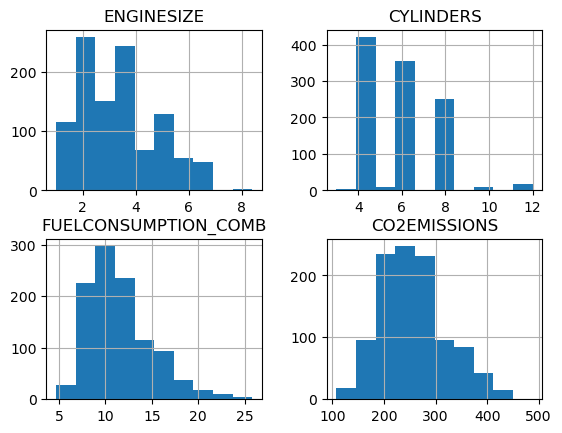

In [6]:
cdf.hist();

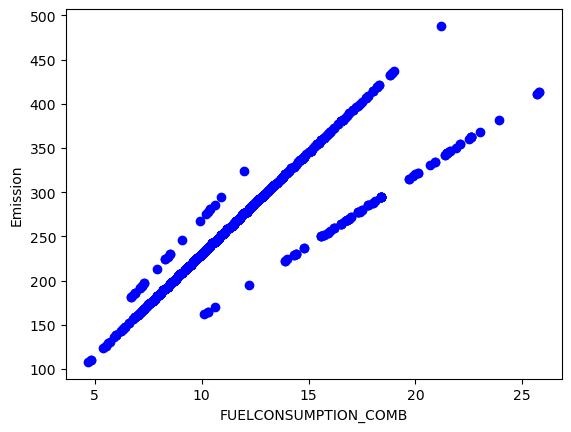

In [7]:
#relationship between variables
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

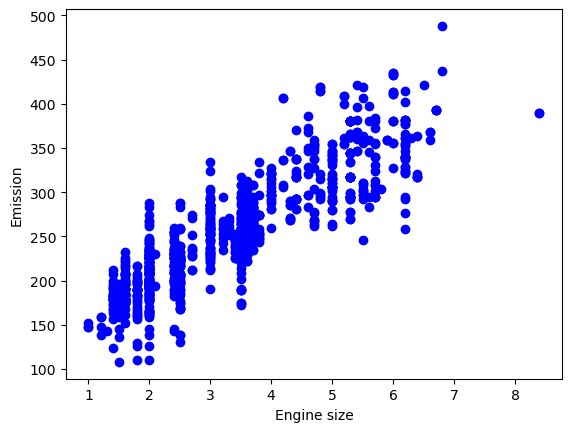

In [8]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

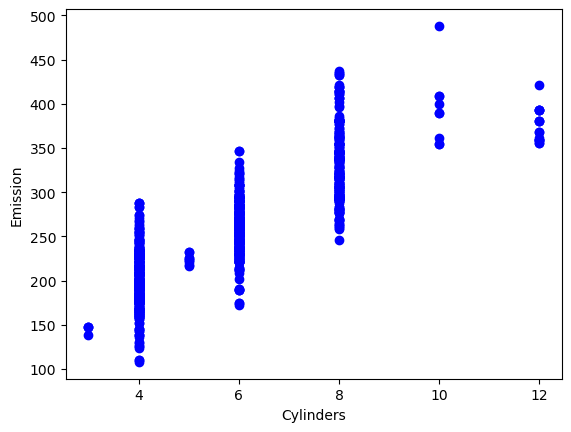

In [9]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

In [10]:
#training and test dataset
mask=np.random.rand(len(cdf))<0.8 #80%-train & 20%-test
train=cdf[mask]
test=cdf[~mask]

# Simple linear regression model

Lets take,
    Independent variable = Engine Size; Dependent variable = Co2 Emissions

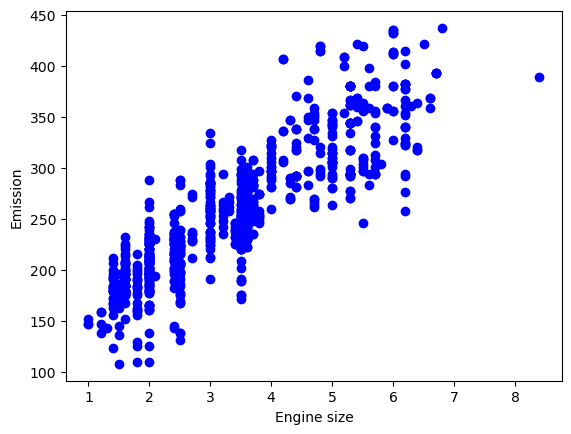

In [11]:
#train data- distribution
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [12]:
#modeling
from sklearn import linear_model
regr=linear_model.LinearRegression()
train_x=np.asanyarray(train[['ENGINESIZE']])
train_y= np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x,train_y)

LinearRegression()

In [13]:
#coefficients
print("Coefficients :",regr.coef_)
print("Intercept :",regr.intercept_)

Coefficients : [[39.377788]]
Intercept : [123.86823727]


Text(0, 0.5, 'Emission')

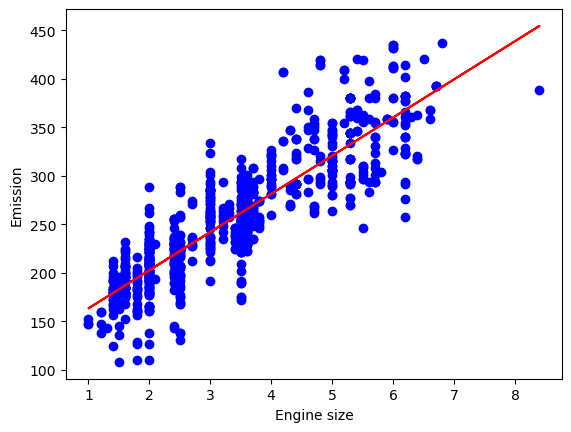

In [14]:
#plot fit line
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue');
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r');
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [15]:
#testing model
test_x=np.asanyarray(test[['ENGINESIZE']])
test_y=np.asanyarray(test[['CO2EMISSIONS']])
test_y1=regr.predict(test_x)

In [16]:
#evaluating model
from sklearn.metrics import r2_score 
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y1 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y1 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y1))

Mean absolute error: 22.36
Residual sum of squares (MSE): 825.76
R2-score: 0.77


R2-score represents how close the data points are to the fitted regression line, the best possible score is 1.0 . The mean error represents the difference between expected and predicted output of the model .

# Multiple Regression Model

In [17]:
#modeling
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)

LinearRegression()

In [18]:
# The coefficients
print ('Coefficients: ', regr.coef_)
print("Intercept :",regr.intercept_)

Coefficients:  [[10.90517709  7.36647697  9.53408332]]
Intercept : [65.96045554]


Given that it is a multiple linear regression model with 3 parameters and that the parameters are the intercept and coefficients of the hyperplane, sklearn can estimate them from our data.

In [19]:
#testing model
x1 = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y1 = np.asanyarray(test[['CO2EMISSIONS']])
y_hat=regr.predict(x1)

In [20]:
#evaluation of the model
print("Residual sum of squares: %.2f" % np.mean((y_hat - y1) ** 2))
print("R2-score: %.2f" % r2_score(y1 ,y_hat))

Residual sum of squares: 441.61
R2-score: 0.87


The best possible R2-score is 1.0 and lower the values are worse the model is.

### Test case

Lets consider a car A with engine size=3 , cylinders = 5 , fuel consumption= 11 and calculate co2 emissions .

In [30]:
A=[[3,5,11]]
pred=regr.predict(A)

In [32]:
pred[0][0]

240.3832882196991

Thus the Co2 emission of our imaginary car A is 240.4 .